<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Lab 1:   Data  Plotting ....
<a class="anchor" id="1"></a> 

In [4]:
ls ../data

HousePrice.csv                  StudentsPerformance.csv
HousePrice1.csv                 Students_Grading_Dataset.csv
HousePrice3.csv                 features_kept1.csv
StudentPerformanceFactors.xlsx  student_performance_large_dataset.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("../data/StudentsPerformance.csv")

In [45]:
df.head()

,gender,Group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Feature Engingeering ....
<a class="anchor" id="1"></a> 

In [46]:
df.isna().sum()

gender                         0
Group                          0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   Group                        1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
df.nunique()

gender                          2
Group                           5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [51]:
#  Categoris per featues 
for col in df.columns:
    print(f" {col:-<50} :   {df[col].unique()}  " )

 gender-------------------------------------------- :   ['female' 'male']  
 Group--------------------------------------------- :   ['group B' 'group C' 'group A' 'group D' 'group E']  
 parental level of education----------------------- :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']  
 lunch--------------------------------------------- :   ['standard' 'free/reduced']  
 test preparation course--------------------------- :   ['none' 'completed']  
 math score---------------------------------------- :   [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]  
 reading score------------------------------------- :   [ 72  90  95  57  78  83  43  64  60 

In [52]:
#  Categoris per featues 
for col in df.columns:
    if df[col].nunique()<10:
        print(f" {col:-<50} :   {df[col].unique()}  " )

 gender-------------------------------------------- :   ['female' 'male']  
 Group--------------------------------------------- :   ['group B' 'group C' 'group A' 'group D' 'group E']  
 parental level of education----------------------- :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']  
 lunch--------------------------------------------- :   ['standard' 'free/reduced']  
 test preparation course--------------------------- :   ['none' 'completed']  


In [53]:
# NUerical & Categorical fetures 
num_features  = df.select_dtypes(include="number").columns
cat_features  = df.select_dtypes(exclude="number").columns


In [54]:
# create new afeatures
df['Score_Total'] = df['math score'] + df['reading score'] + df['writing score']
df['Score_Avg'] = df['Score_Total'] / 3


In [55]:

# Best  Full Marks 
FM_reading = df[df['reading score'] == 100]['Score_Avg'].count()
FM_writing = df[df['writing score'] == 100]['Score_Avg'].count()
FM_Math = df[df['math score'] == 100]['Score_Avg'].count()


In [78]:
# Calculate the percentage of students with full marks in each subject
for subject in ['math score', 'reading score', 'writing score']:
    percent = (df[subject] <= 20).mean() * 100
    print(f"{subject.capitalize()}: {percent:.2f}%")

Math score: 0.40%
Reading score: 0.10%
Writing score: 0.30%


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Plotting ....
<a class="anchor" id="1"></a> 

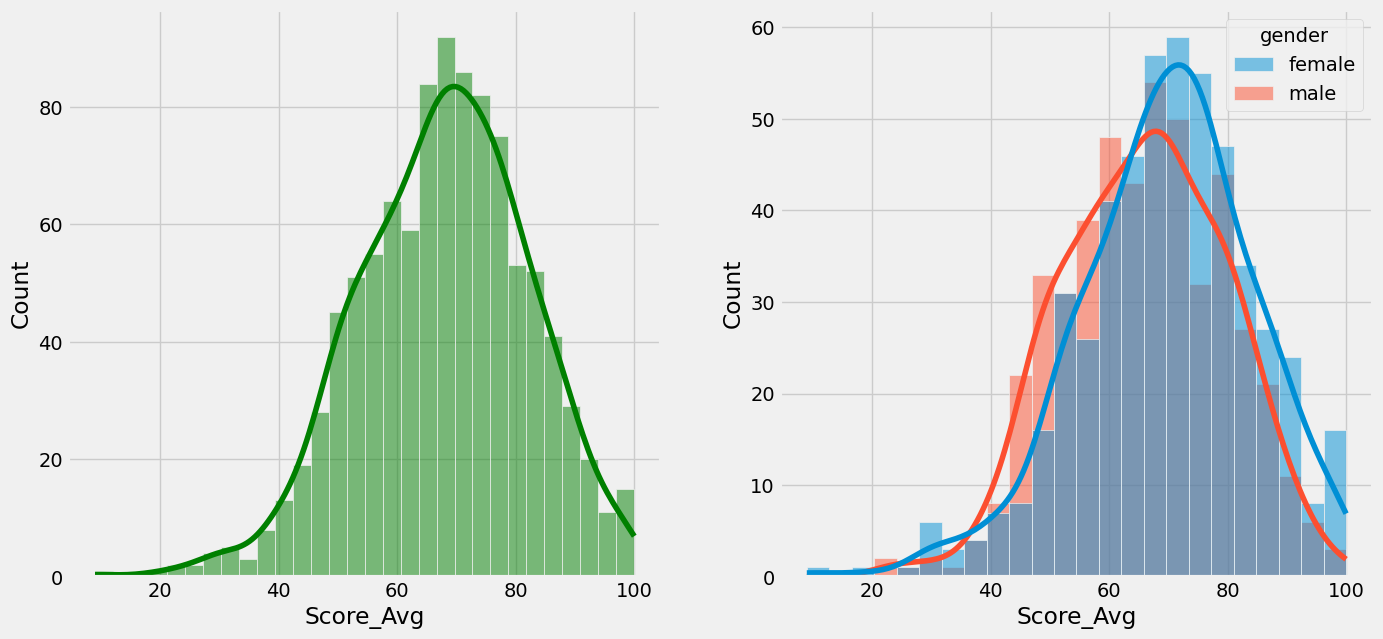

In [79]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Score_Avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Score_Avg',kde=True,hue='gender')
plt.show()

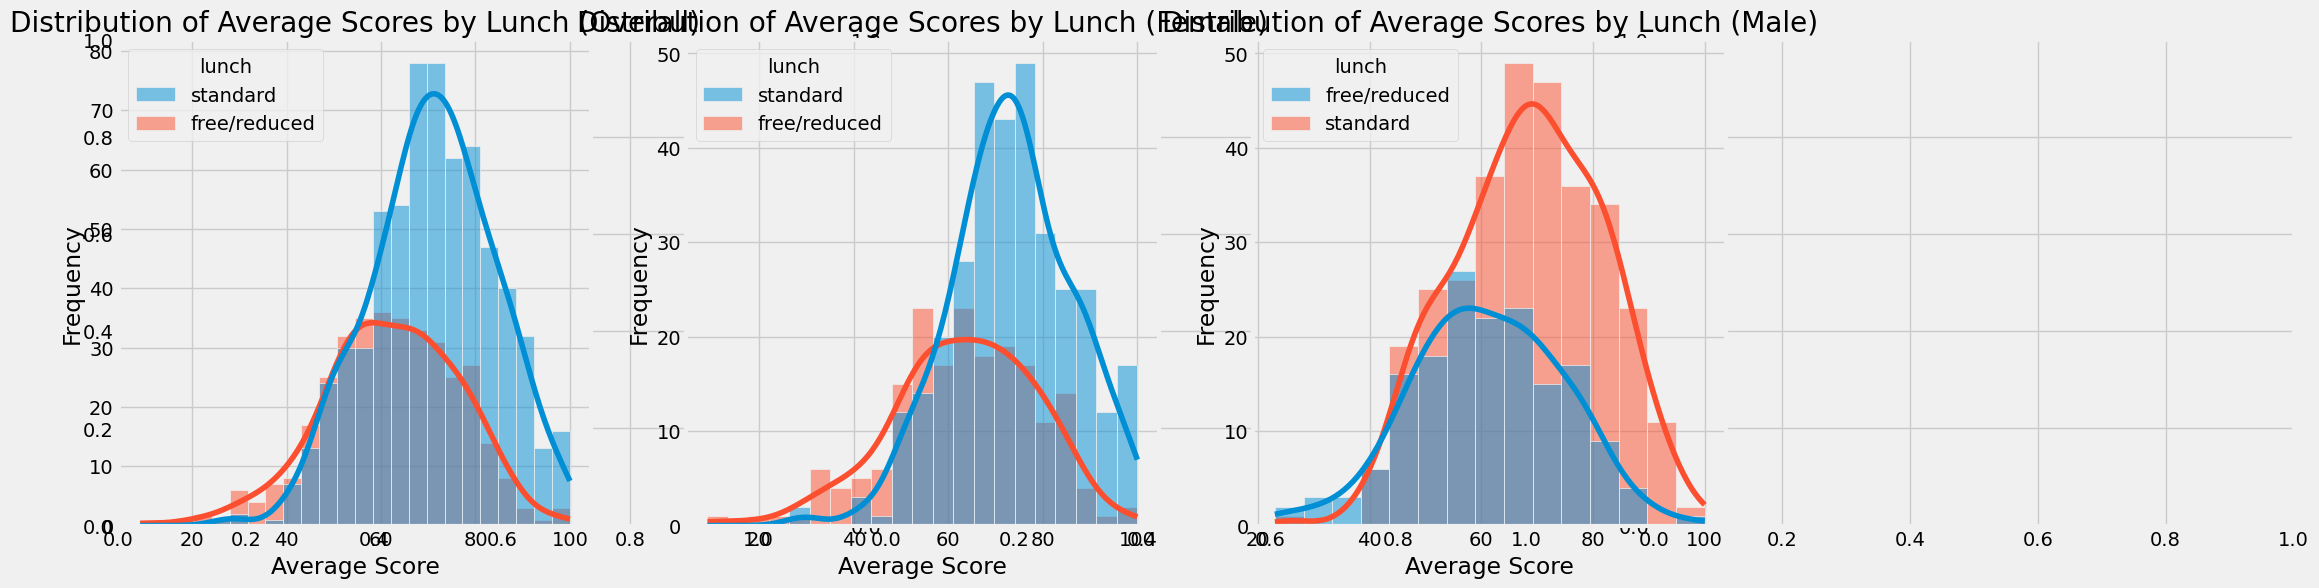

In [80]:
# Create a subplot with three histograms side by side
plt.subplots(1, 3, figsize=(25, 6))

# Plot the first histogram with KDE, differentiated by lunch type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='Score_Avg', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Overall)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by lunch type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Score_Avg', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Female)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the third histogram with KDE, differentiated by lunch type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Score_Avg', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Male)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
# plt.tight_layout()
plt.show()

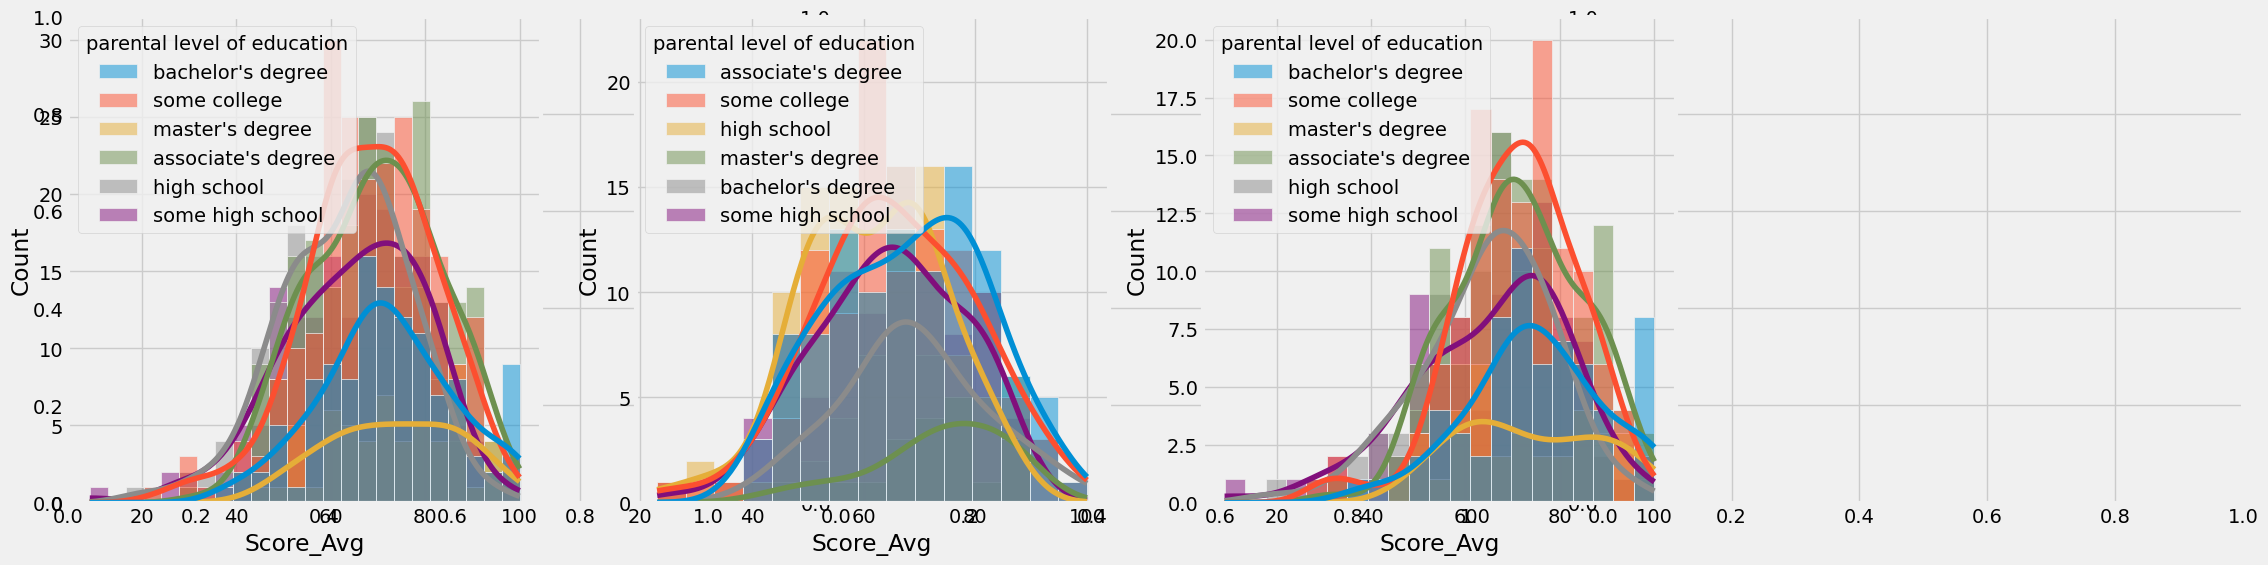

In [81]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='Score_Avg',kde=True,hue='parental level of education')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Score_Avg',kde=True,hue='parental level of education')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Score_Avg',kde=True,hue='parental level of education')

plt.show()

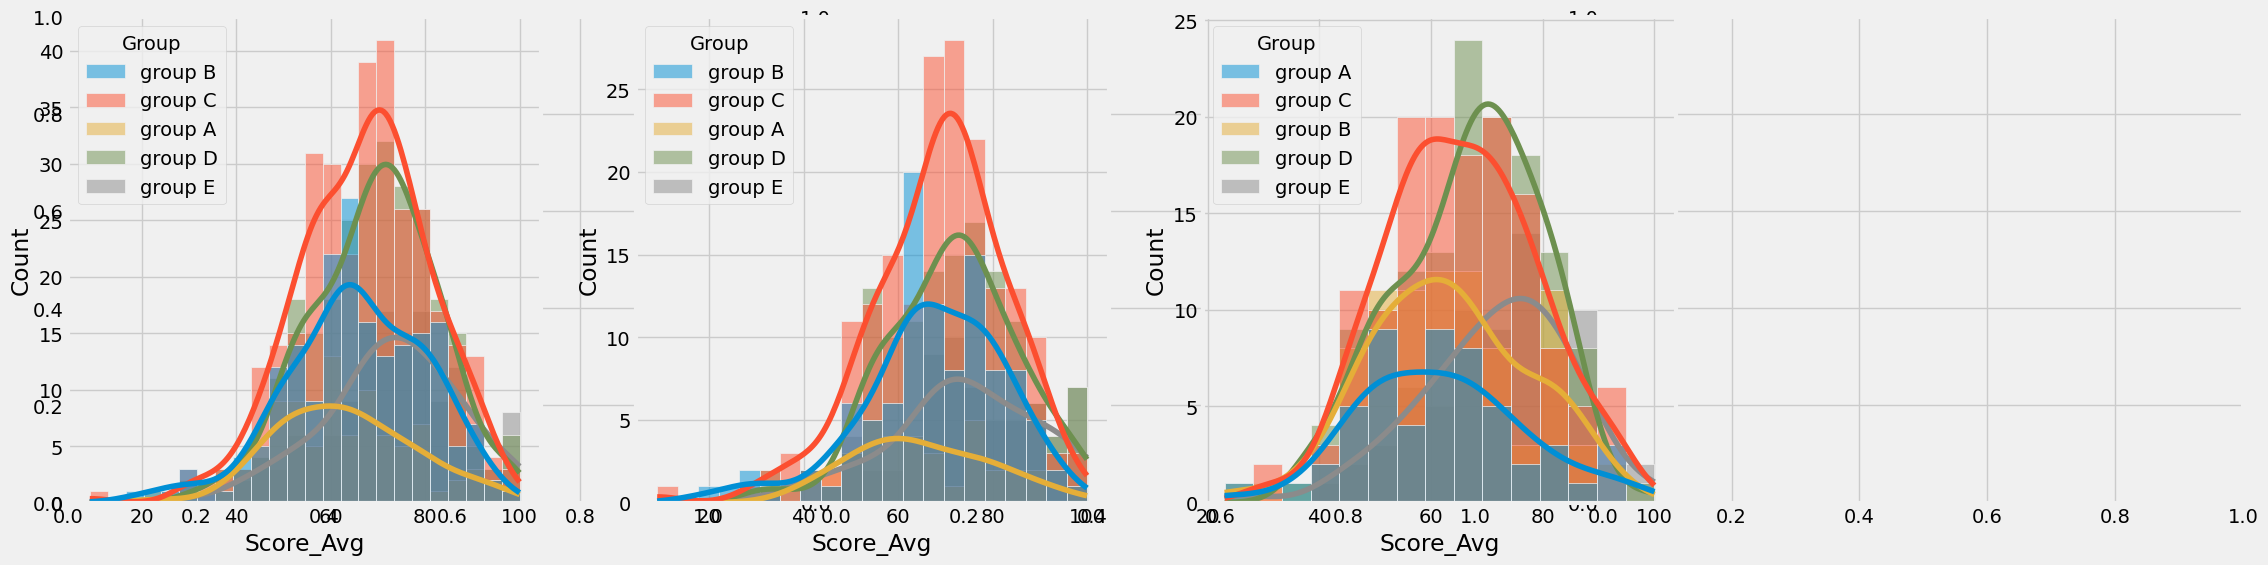

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Score_Avg',kde=True,hue='Group')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Score_Avg',kde=True,hue='Group')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Score_Avg',kde=True,hue='Group')
plt.show()

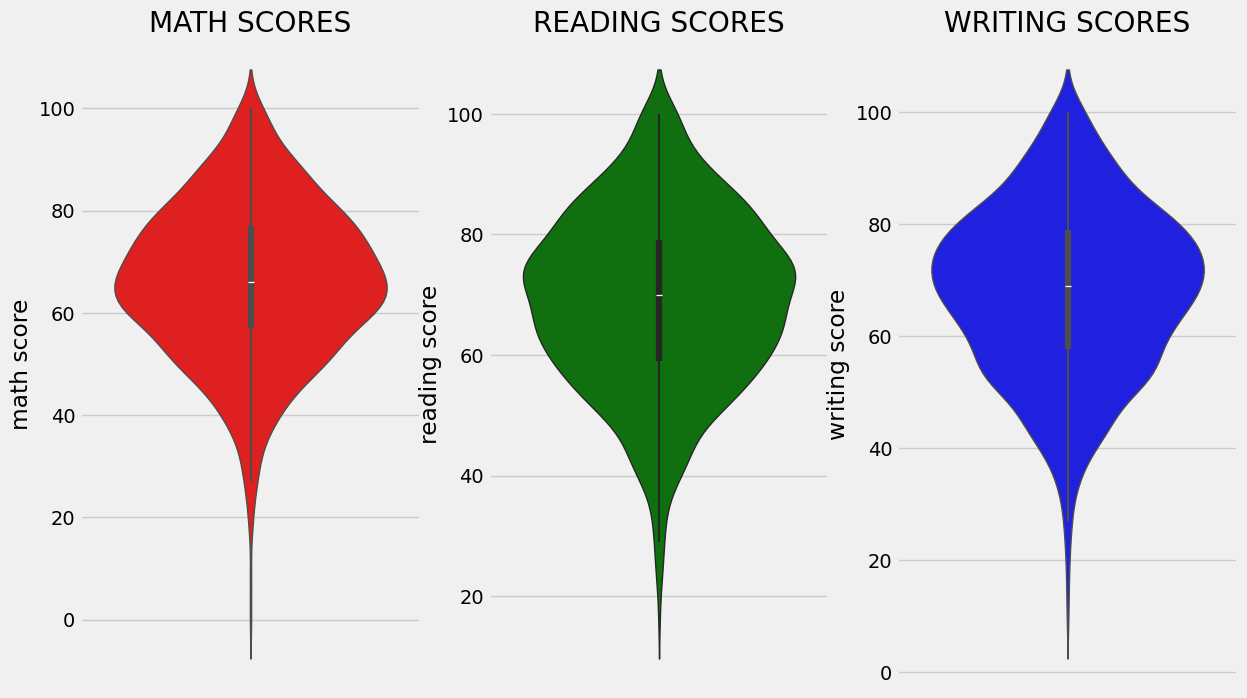

In [83]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=1)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=1)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=1)
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

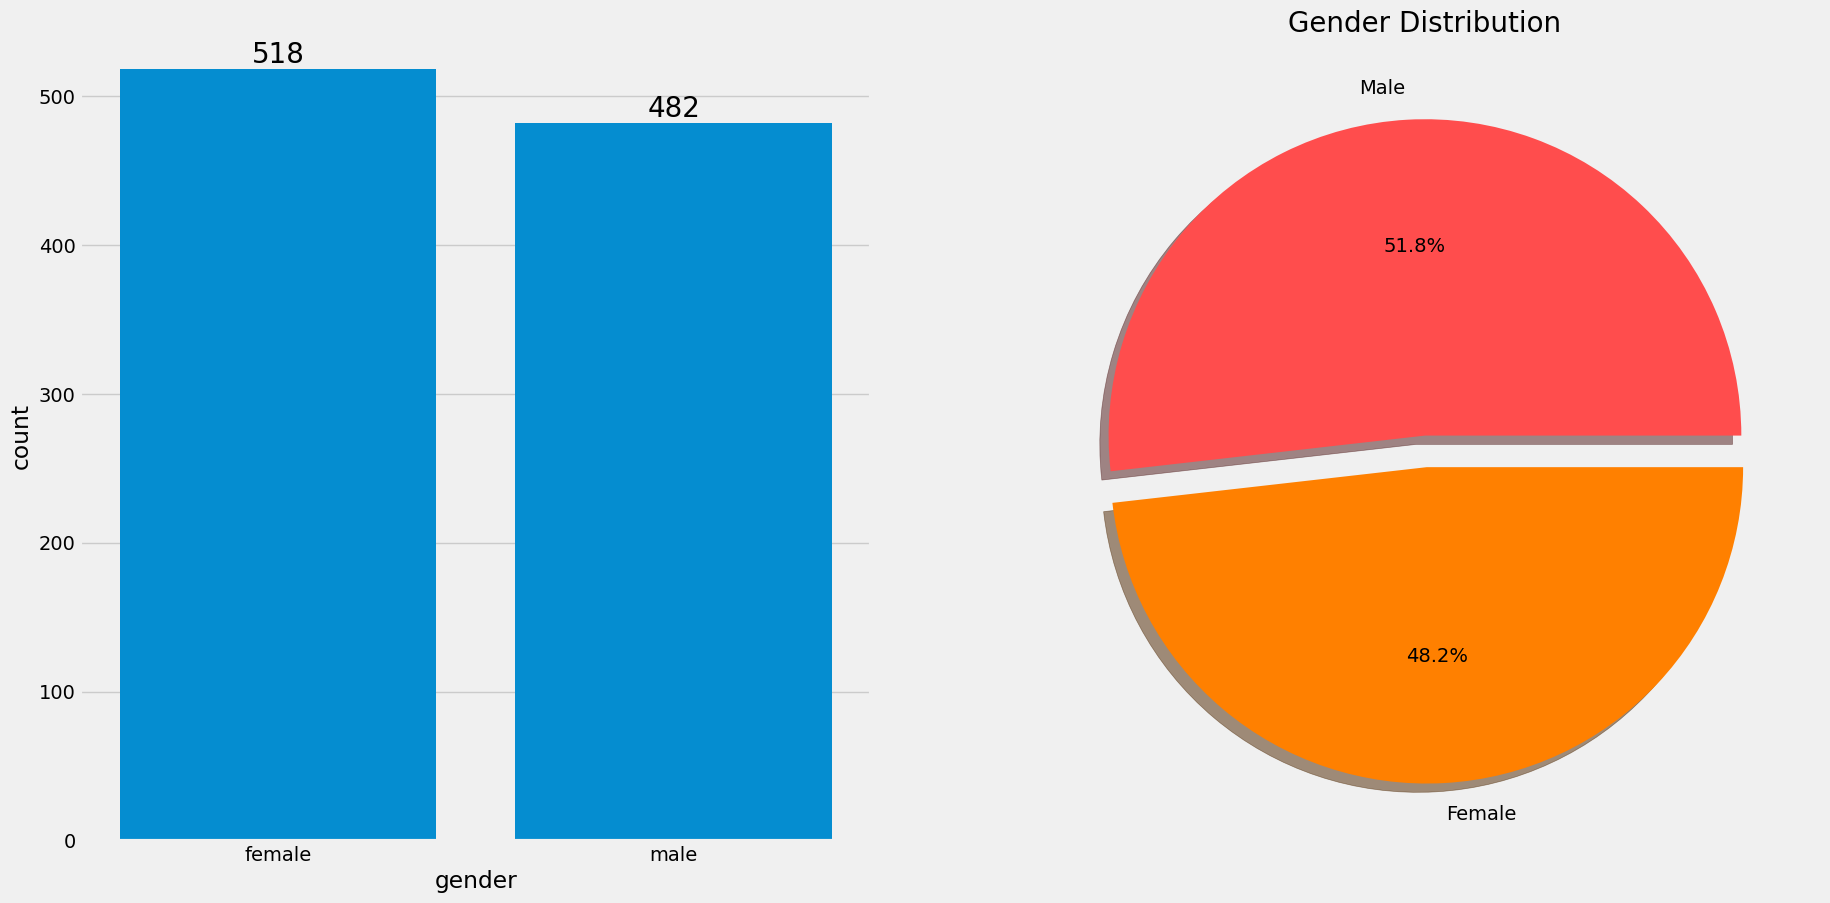

In [84]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender on the left side
sns.countplot(x=df['gender'], data=df, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for gender distribution on the right side
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
        autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

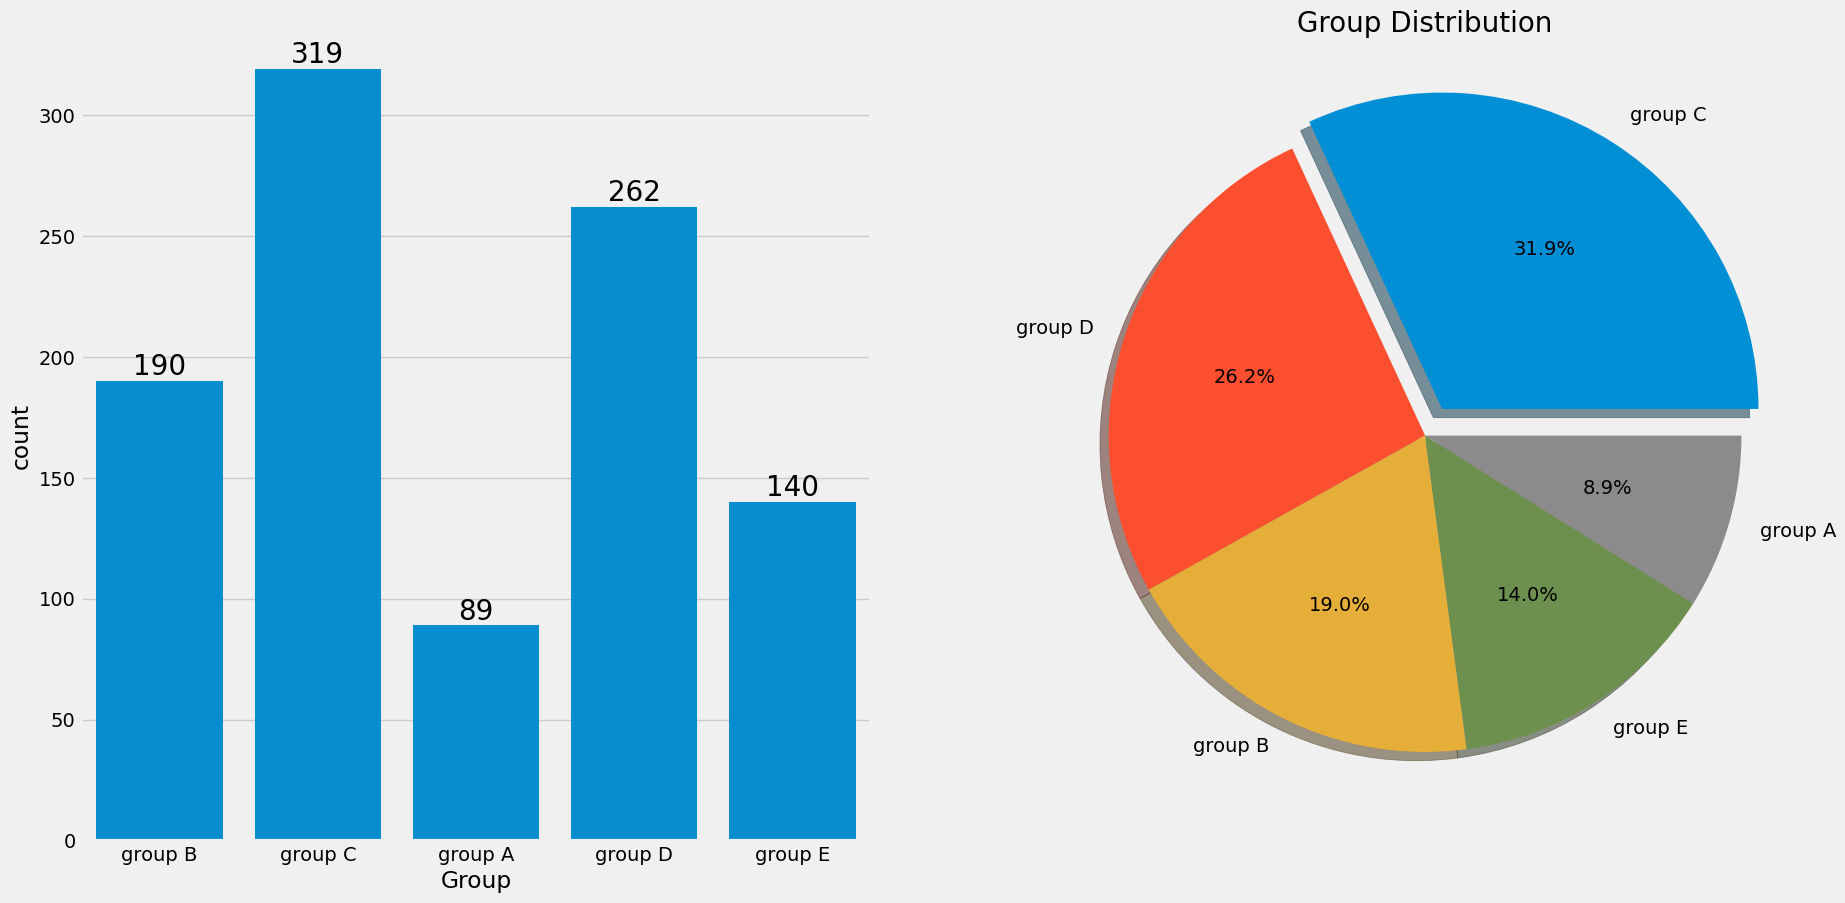

In [85]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for race/ethnicity on the left side
sns.countplot(x=df.Group, data=df, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for race/ethnicity distribution on the right side
plt.pie(x=df.Group.value_counts(), labels=df.Group.value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Group Distribution', fontsize=20)

# Display the subplots
plt.show()

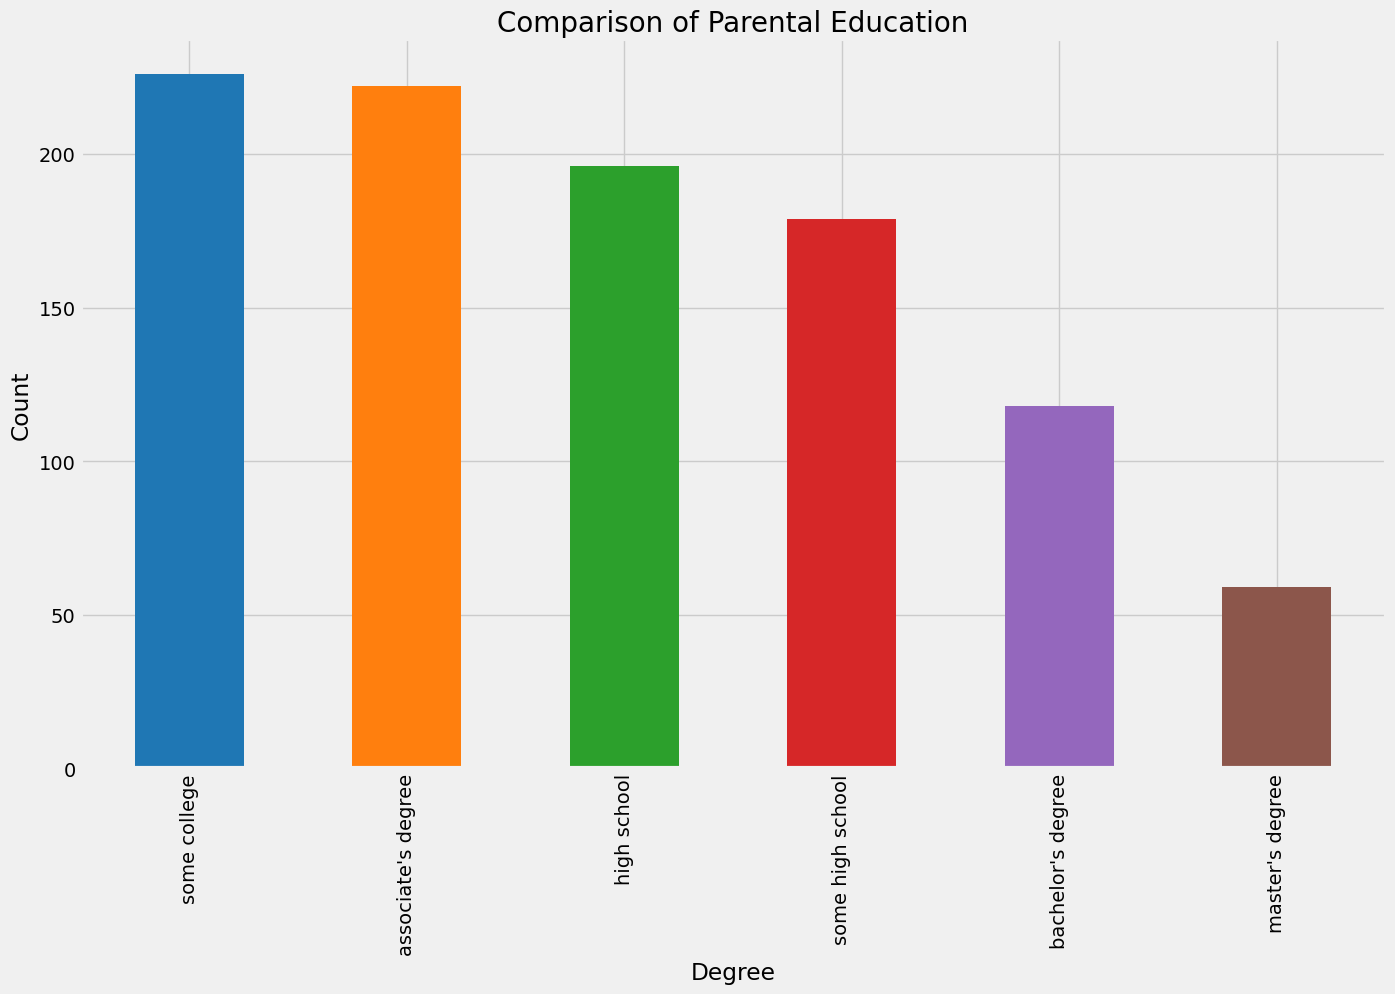

In [86]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a bar plot for the count of each parental level of education
df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()

In [87]:
df.keys()

Index(['gender', 'Group', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Score_Total', 'Score_Avg'],
      dtype='object')

In [88]:

df.groupby('parental level of education')[num_features].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


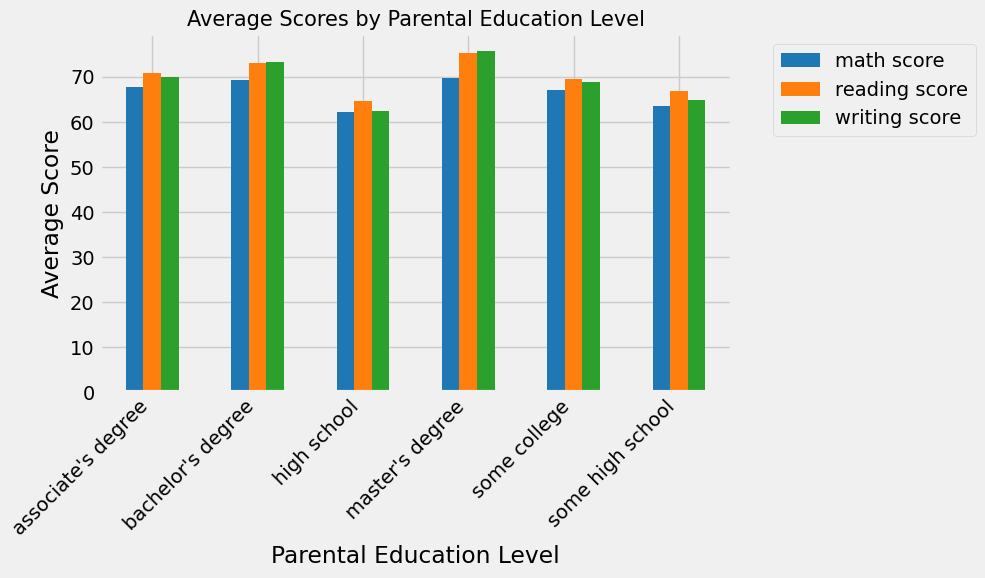

In [95]:
# Set the style and figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Group the data by 'parental level of education' and calculate the mean for each group
gpByParentEd = df.groupby('parental level of education')[num_features].mean()

# Create a grouped bar chart
gpByParentEd.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Average Scores by Parental Education Level', fontsize=15)
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

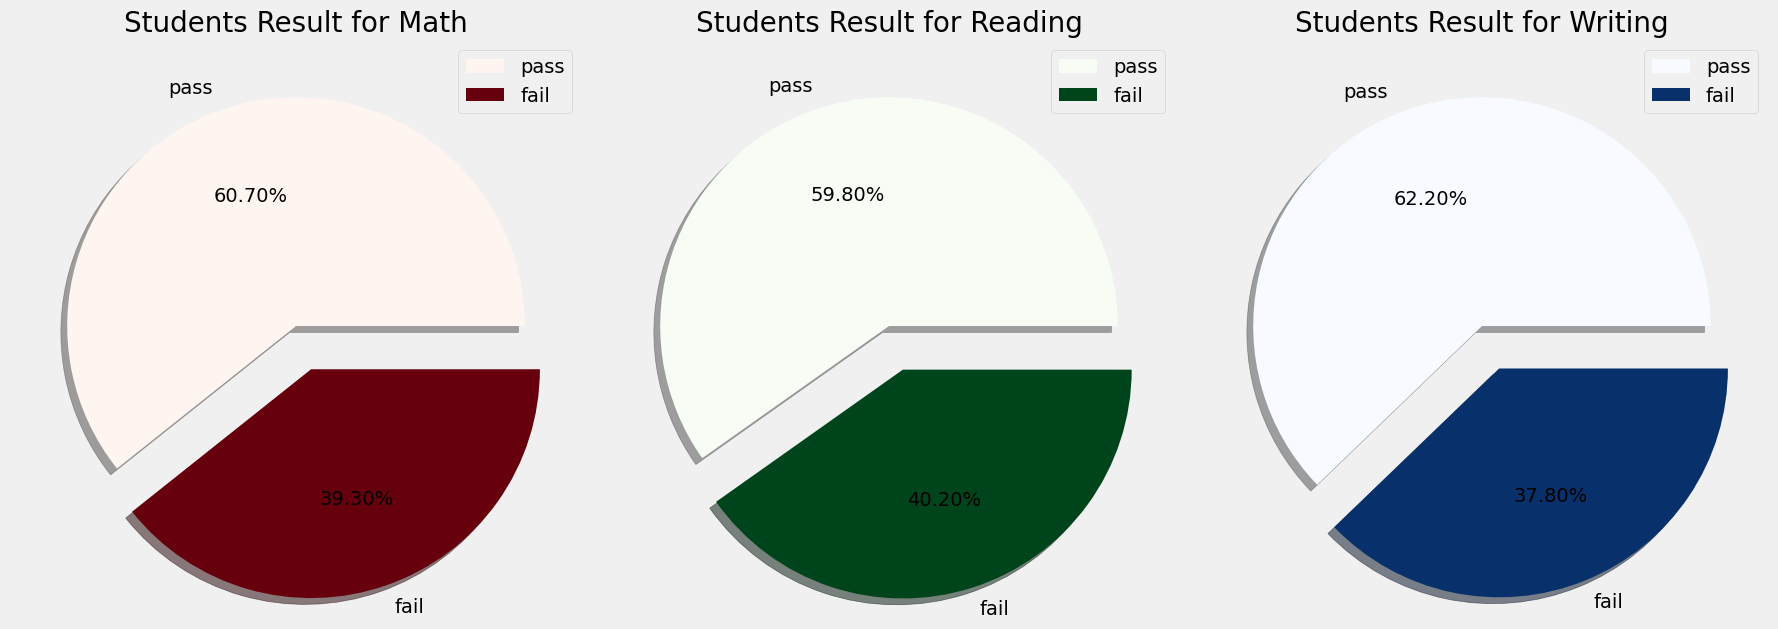

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset if needed)
data = pd.DataFrame({
    'math score': np.random.randint(0, 100, 1000),
    'reading score': np.random.randint(0, 100, 1000),
    'writing score': np.random.randint(0, 100, 1000)
})

# Setting a passing mark
passmarks = 40
plt.rcParams['figure.figsize'] = (18, 12)

# List of subjects
subjects = ['math', 'reading', 'writing']

# 1. Create pass/fail columns for all subjects using a loop
for subject in subjects:
    data[f'pass_{subject}'] = np.where(data[f'{subject} score'] < passmarks, 'Fail', 'Pass')

# 2. Plot pie charts for pass/fail ratios using a loop
colors_dict = {
    'math': plt.cm.Reds,
    'reading': plt.cm.Greens,
    'writing': plt.cm.Blues
}

fig, axes = plt.subplots(1, 3)  # Create a 1x3 subplot grid
for i, subject in enumerate(subjects, 1):
    # Calculate pass/fail counts
    size = data[f'pass_{subject}'].value_counts()
    
    # Define colors, labels, and explode
    colors = colors_dict[subject](np.linspace(0, 1, len(size)))
    labels = ["pass", "fail"]
    explode = [0, 0.2]
    
    # Plot pie chart
    plt.subplot(1, 3, i)
    plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', explode=explode, shadow=True)
    plt.title(f'Students Result for {subject.capitalize()}', fontsize=20)
    plt.legend()

plt.tight_layout()
plt.show()

In [97]:
df.keys()

Index(['gender', 'Group', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Score_Total', 'Score_Avg'],
      dtype='object')

In [ ]:
grouped_means_sorted = gpByParentEd.sort_values(by='Score_Avg', ascending=False)

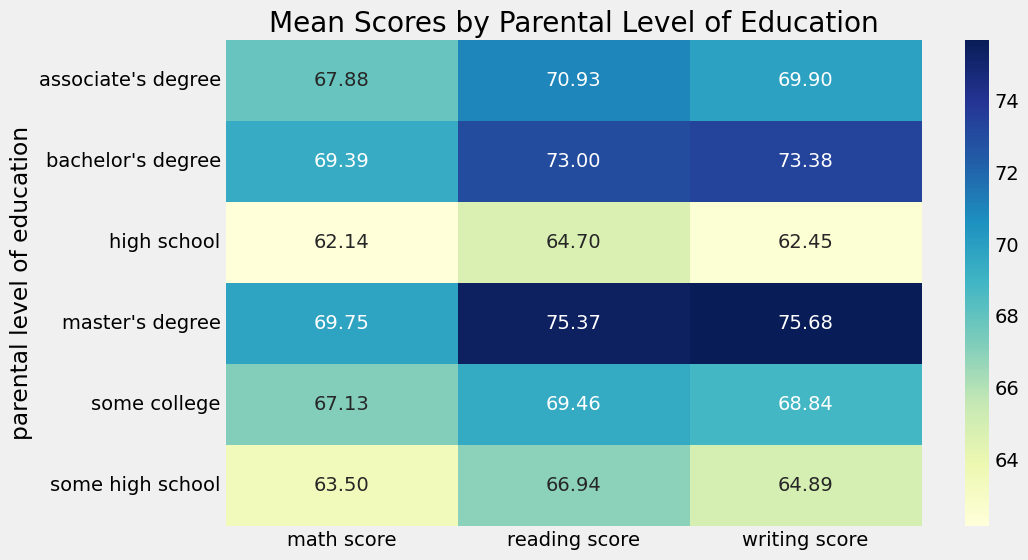

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(gpByParentEd, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Mean Scores by Parental Level of Education')
plt.show()